In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD'],  axis=1, inplace=True)
df.head()

,outcome,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [7]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [8]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [9]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, stratify=y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [10]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train_old, y_train_old)

Counter(y_train)

Counter({1.0: 763, 0.0: 763})

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77       763
         1.0       0.78      0.75      0.76       763

    accuracy                           0.77      1526
   macro avg       0.77      0.77      0.77      1526
weighted avg       0.77      0.77      0.77      1526

[[604 159]
 [193 570]]
root mean squared error (RMSE): 0.48027951669278246
R-squared (R2 ): 0.07732634338138922
MAE 0.2306684141546527

Testing SET
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       254
         1.0       0.40      0.80      0.53        40

    accuracy                           0.81       294
   macro avg       0.68      0.80      0.70       294
weighted avg       0.89      0.81      0.83       294

[[205  49]
 [  8  32]]
root mean squared error (RMSE): 0.44031528592635544
R-squared (R2 ): -0.6494094488188975
MAE 0.19387755102040816



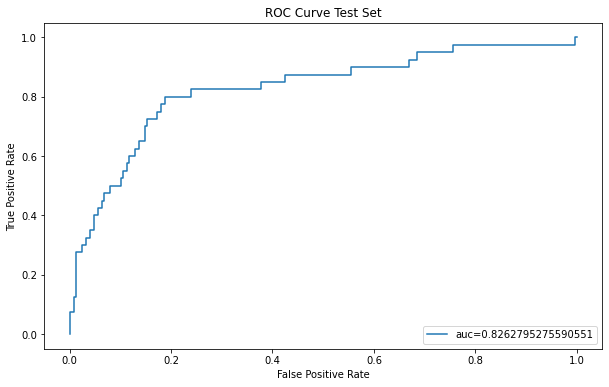

In [12]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [13]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                     Feature  Importance
34                      PCO2    0.911924
19                       INR    0.766607
8                        RBC    0.706873
23             Urea nitrogen    0.508316
13                 Leucocyte    0.436690
36             Comorbidities    0.422411
29                 Anion gap    0.381780
11                       MCV    0.363917
31                        PH    0.338419
0                 heart rate    0.314688
33               Lactic acid    0.251970
30             Magnesium ion    0.238283
12                       RDW    0.222950
16                 Basophils    0.216238
35                        EF    0.132121
3           Respiratory rate    0.070632
4                temperature    0.033179
25           Blood potassium    0.007764
26              Blood sodium   -0.001370
10                      MCHC   -0.006481
20                 NT-proBNP   -0.023507
1    Systolic blood pressure   -0.026014
9                        MCH   -0.036386
15              

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       254
         1.0       0.26      0.28      0.27        40

    accuracy                           0.79       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.80      0.79      0.80       294

[[222  32]
 [ 29  11]]
root mean squared error (RMSE): 0.4555030111835474
R-squared (R2 ): -0.7651574803149606
MAE 0.20748299319727892



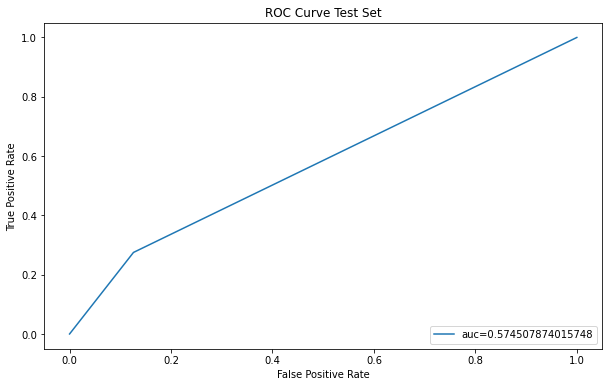

In [14]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       254
         1.0       0.55      0.15      0.24        40

    accuracy                           0.87       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.83      0.87      0.83       294

[[249   5]
 [ 34   6]]
root mean squared error (RMSE): 0.3642156795423418
R-squared (R2 ): -0.1285433070866142
MAE 0.1326530612244898



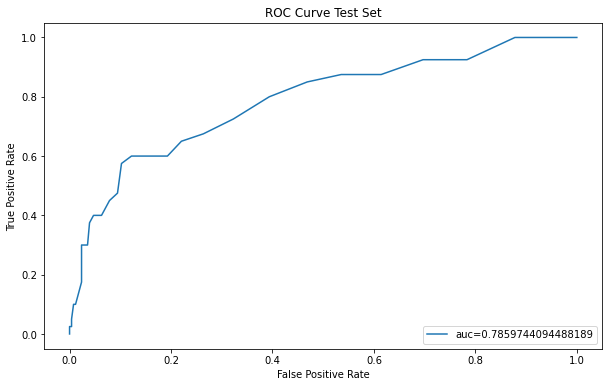

In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [16]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.07714132797354484, 'Urine output'),
 (0.06980536752589045, 'Bicarbonate'),
 (0.05232075952587544, 'Anion gap'),
 (0.04543141827440012, 'Blood calcium'),
 (0.04425152979779166, 'Leucocyte'),
 (0.03915046719525993, 'RDW'),
 (0.03835812896924815, 'Urea nitrogen'),
 (0.03682618740641368, 'Blood sodium'),
 (0.032444132579616716, 'Lymphocyte'),
 (0.032392763165482064, 'Systolic blood pressure'),
 (0.0315785753087196, 'heart rate'),
 (0.026653976270110364, 'Magnesium ion'),
 (0.025378245526526476, 'Blood potassium'),
 (0.02509781484509402, 'Lactic acid'),
 (0.02431024503287197, 'Creatinine'),
 (0.023388119545191297, 'Respiratory rate'),
 (0.023070165136775886, 'SP O2'),
 (0.022338697757516707, 'PCO2'),
 (0.02210862575201106, 'temperature'),
 (0.021973859569515686, 'PT'),
 (0.02182592907569414, 'Platelets'),
 (0.020847541279602977, 'glucose'),
 (0.020839010050214987, 'MCV'),
 (0.020583890792144927, 'Chloride'),
 (0.019858660604754143, 'Neutrophils'),
 (0.019821038347504975, 'PH'),
 (0.0186

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       254
         1.0       0.50      0.03      0.05        40

    accuracy                           0.86       294
   macro avg       0.68      0.51      0.49       294
weighted avg       0.82      0.86      0.81       294

[[253   1]
 [ 39   1]]
root mean squared error (RMSE): 0.36885555678165877
R-squared (R2 ): -0.15748031496062986
MAE 0.1360544217687075



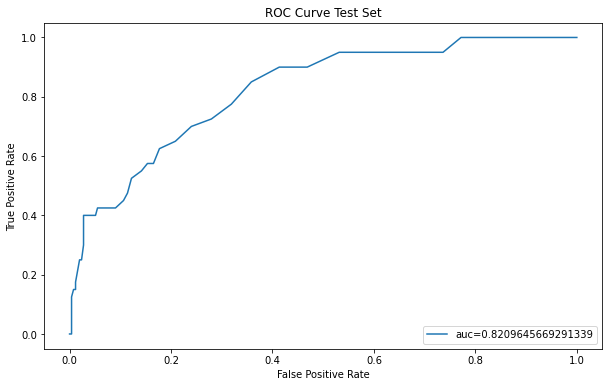

In [17]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       763
         1.0       0.89      0.92      0.91       763

    accuracy                           0.90      1526
   macro avg       0.91      0.90      0.90      1526
weighted avg       0.91      0.90      0.90      1526

[[680  83]
 [ 62 701]]
root mean squared error (RMSE): 0.30825258999697425
R-squared (R2 ): 0.6199213630406291
MAE 0.09501965923984272

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       254
         1.0       0.44      0.60      0.51        40

    accuracy                           0.84       294
   macro avg       0.69      0.74      0.71       294
weighted avg       0.87      0.84      0.85       294

[[224  30]
 [ 16  24]]
root mean squared error (RMSE): 0.3955535172818131
R-squared (R2 ): -0.33110236220472444
MAE 0.1564625850340136



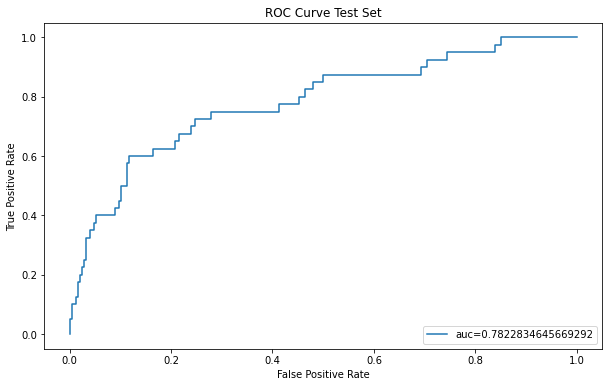

In [18]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       763
         1.0       0.99      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[757   6]
 [  1 762]]
root mean squared error (RMSE): 0.06772854614785964
R-squared (R2 ): 0.981651376146789
MAE 0.0045871559633027525

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       254
         1.0       0.47      0.47      0.48        40

    accuracy                           0.86       294
   macro avg       0.70      0.70      0.70       294
weighted avg       0.86      0.86      0.86       294

[[233  21]
 [ 21  19]]
root mean squared error (RMSE): 0.3779644730092272
R-squared (R2 ): -0.2153543307086614
MAE 0.14285714285714285



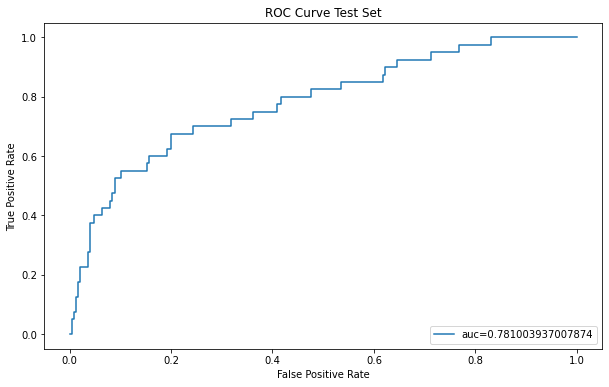

In [19]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       254
         1.0       0.56      0.25      0.34        40

    accuracy                           0.87       294
   macro avg       0.72      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294

[[246   8]
 [ 30  10]]
root mean squared error (RMSE): 0.35951592548908334
R-squared (R2 ): -0.09960629921259834
MAE 0.1292517006802721



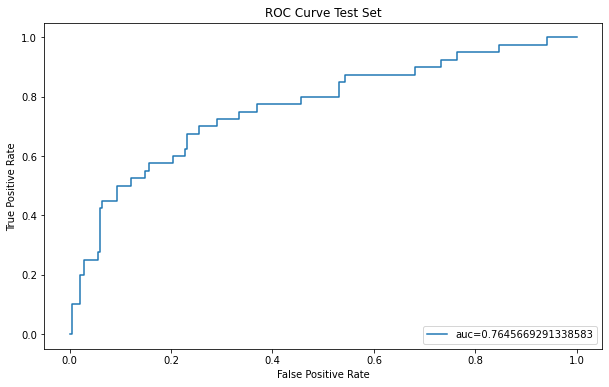

In [20]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       254
         1.0       0.72      0.33      0.45        40

    accuracy                           0.89       294
   macro avg       0.81      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

[[249   5]
 [ 27  13]]
root mean squared error (RMSE): 0.329914439536929
R-squared (R2 ): 0.07401574803149613
MAE 0.10884353741496598



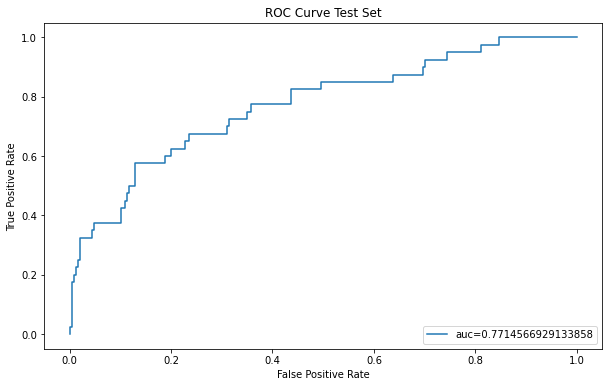

In [21]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       763
         1.0       0.96      0.99      0.98       763

    accuracy                           0.98      1526
   macro avg       0.98      0.98      0.98      1526
weighted avg       0.98      0.98      0.98      1526

[[733  30]
 [  5 758]]
root mean squared error (RMSE): 0.15144563320384566
R-squared (R2 ): 0.908256880733945
MAE 0.022935779816513763

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       254
         1.0       0.43      0.45      0.44        40

    accuracy                           0.84       294
   macro avg       0.67      0.68      0.67       294
weighted avg       0.85      0.84      0.85       294

[[230  24]
 [ 22  18]]
root mean squared error (RMSE): 0.3955535172818131
R-squared (R2 ): -0.33110236220472444
MAE 0.1564625850340136



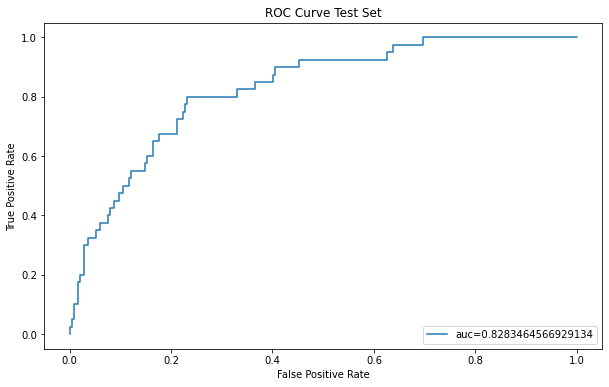

In [22]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

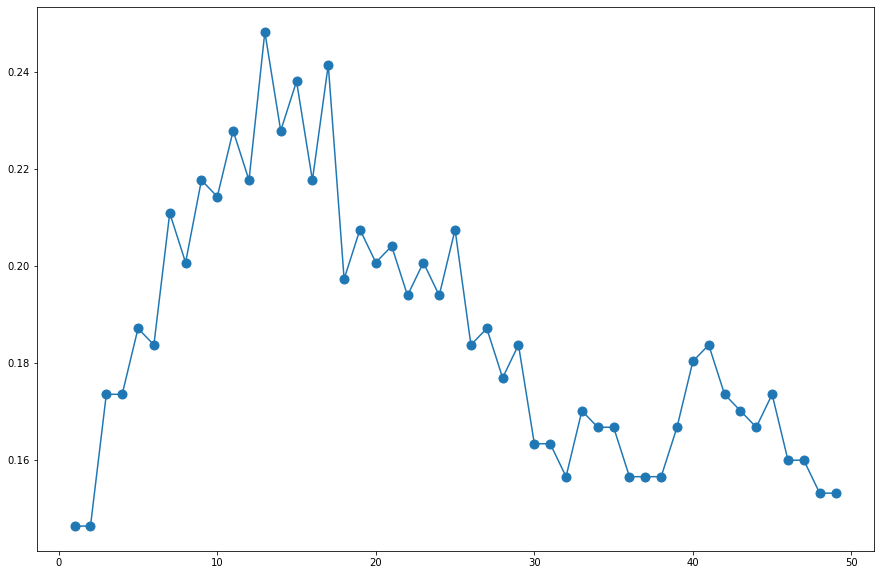

In [23]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       763
         1.0       0.90      1.00      0.95       763

    accuracy                           0.94      1526
   macro avg       0.95      0.94      0.94      1526
weighted avg       0.95      0.94      0.94      1526

[[680  83]
 [  3 760]]
root mean squared error (RMSE): 0.2373952138294875
R-squared (R2 ): 0.7745740498034076
MAE 0.0563564875491481

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       254
         1.0       0.34      0.40      0.37        40

    accuracy                           0.81       294
   macro avg       0.62      0.64      0.63       294
weighted avg       0.83      0.81      0.82       294

[[223  31]
 [ 24  16]]
root mean squared error (RMSE): 0.4325214791567845
R-squared (R2 ): -0.5915354330708662
MAE 0.1870748299319728



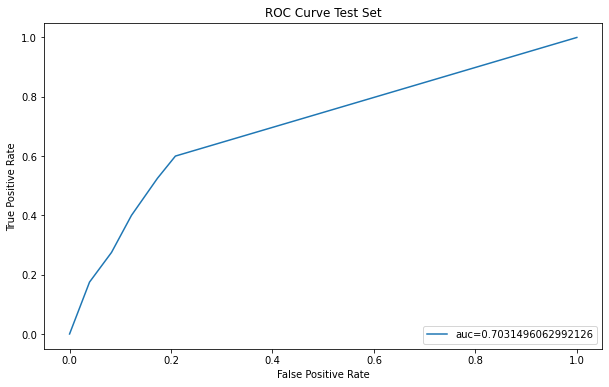

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)